In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from surprise import KNNBasic, SVD, Reader, accuracy, Dataset
from surprise.model_selection import cross_validate, train_test_split
%matplotlib inline


In [40]:
ratings=pd.read_csv("/content/drive/MyDrive/ratings_small.csv")
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [72]:
reader = Reader(line_format='user item rating timestamp',sep=',',skip_lines=1)
ratings= Dataset.load_from_file("/content/drive/MyDrive/ratings_small.csv",reader)

In [42]:
pmf_svd = SVD(biased = False)
cv_pmf = cross_validate(pmf_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0078  1.0133  1.0081  0.9949  1.0097  1.0068  0.0063  
MAE (testset)     0.7803  0.7805  0.7769  0.7684  0.7816  0.7775  0.0048  
Fit time          4.00    4.97    4.70    3.93    3.89    4.30    0.45    
Test time         0.10    0.24    0.10    0.21    0.09    0.15    0.06    


In [43]:
cv_pmf

{'test_rmse': array([1.00780865, 1.01328127, 1.00811952, 0.99485148, 1.00971492]),
 'test_mae': array([0.7802861 , 0.78050461, 0.7768727 , 0.76839136, 0.78156572]),
 'fit_time': (3.997000217437744,
  4.966026782989502,
  4.700725078582764,
  3.9280529022216797,
  3.8911681175231934),
 'test_time': (0.10040140151977539,
  0.24105525016784668,
  0.09835433959960938,
  0.21428465843200684,
  0.0918416976928711)}

In [44]:
print('Average MAE for PMF Collaborative Filtering: ', cv_pmf['test_mae'].mean())
print('Average RMSE for PMF Collaborative Filtering: ', cv_pmf['test_rmse'].mean())

Average MAE for PMF Collaborative Filtering:  0.777524097922878
Average RMSE for PMF Collaborative Filtering:  1.0067551679332838


In [45]:
sim_options = {'user_based': True}
user_based_cf = KNNBasic(sim_options=sim_options)
cv_ub = cross_validate(user_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9613  0.9607  0.9696  0.9709  0.9735  0.9672  0.0052  
MAE (testset)     0.7397  0.7373  0.7431  0.7468  0.7502  0.7434  0.0047  
Fit time          0.10    0.10    0.11    0.10    0.10    0.10    0.00    
Test time         1.37    1.19    1.22    1.29    1.22    1.26    0.06    


In [46]:
print('Average MAE for User-based Collaborative Filtering: ', cv_ub['test_mae'].mean())
print('Average RMSE for User-based Collaborative Filtering: ', cv_ub['test_rmse'].mean())

Average MAE for User-based Collaborative Filtering:  0.7434001530332057
Average RMSE for User-based Collaborative Filtering:  0.9671998560977239


In [47]:
sim_options = {'user_based': False}
item_based_cf = KNNBasic(sim_options=sim_options)
cv_ib = cross_validate(item_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9238  0.9274  0.9440  0.9478  0.9319  0.9350  0.0094  
MAE (testset)     0.7163  0.7147  0.7267  0.7271  0.7201  0.7210  0.0051  
Fit time          4.27    3.19    3.13    2.85    2.78    3.24    0.54    
Test time         5.73    5.65    5.38    5.63    6.45    5.77    0.36    


In [48]:
print('Average MAE for Item-based Collaborative Filtering: ', cv_ib['test_mae'].mean())
print('Average RMSE for Item-based Collaborative Filtering: ', cv_ib['test_rmse'].mean())

Average MAE for Item-based Collaborative Filtering:  0.7209629436269387
Average RMSE for Item-based Collaborative Filtering:  0.9349952975726449


In [49]:
### Item Based Collaborative Filtering

In [50]:
sim_options = {'name':'cosine', 'user_based': True}
ub_cosine = KNNBasic(sim_options=sim_options);
cv_ub_cosine = cross_validate(ub_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9955  0.9967  0.9965  0.9861  0.9937  0.9937  0.0040  
MAE (testset)     0.7679  0.7669  0.7719  0.7605  0.7705  0.7675  0.0040  
Fit time          0.28    0.27    0.29    0.29    0.31    0.29    0.01    
Test time         1.33    1.19    1.35    1.21    1.35    1.28    0.07    


In [51]:
sim_options = {'name':'msd', 'user_based': True}
ub_msd = KNNBasic(sim_options=sim_options);
cv_ub_msd = cross_validate(ub_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9724  0.9750  0.9697  0.9643  0.9636  0.9690  0.0044  
MAE (testset)     0.7444  0.7491  0.7453  0.7405  0.7437  0.7446  0.0028  
Fit time          0.08    0.11    0.10    0.10    0.10    0.10    0.01    
Test time         1.23    1.18    1.22    1.21    1.36    1.24    0.06    


In [52]:
sim_options = {'name':'pearson', 'user_based': True}
ub_pearson = KNNBasic(sim_options=sim_options);
cv_ub_pearson = cross_validate(ub_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0000  0.9969  0.9954  0.9981  0.9944  0.9970  0.0020  
MAE (testset)     0.7743  0.7716  0.7721  0.7725  0.7690  0.7719  0.0017  
Fit time          0.43    0.43    0.47    0.41    0.42    0.43    0.02    
Test time         1.20    1.37    1.22    1.36    1.21    1.27    0.08    


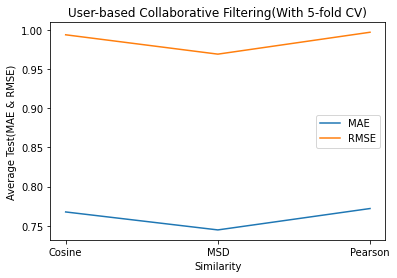

In [53]:
x = [0,1,2]
y_mae = [cv_ub_cosine['test_mae'].mean(),cv_ub_msd['test_mae'].mean(),cv_ub_pearson['test_mae'].mean()]
y_rmse = [cv_ub_cosine['test_rmse'].mean(),cv_ub_msd['test_rmse'].mean(),cv_ub_pearson['test_rmse'].mean()]
plt.plot(x, y_mae)
plt.plot(x, y_rmse)
plt.title('User-based Collaborative Filtering(With 5-fold CV)')
plt.legend(['MAE','RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Average Test(MAE & RMSE)')
plt.show()

In [54]:
sim_options = {'name':'cosine', 'user_based': False}
ib_cosine = KNNBasic(sim_options=sim_options);
cv_ib_cosine = cross_validate(ib_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9938  0.9953  0.9961  0.9993  0.9861  0.9941  0.0044  
MAE (testset)     0.7732  0.7753  0.7747  0.7760  0.7681  0.7735  0.0028  
Fit time          9.39    9.24    10.12   9.48    9.79    9.60    0.31    
Test time         5.27    5.22    5.91    5.18    5.49    5.41    0.27    


In [55]:
sim_options = {'name':'msd', 'user_based': False}
ib_msd = KNNBasic(sim_options=sim_options);
cv_ib_msd = cross_validate(ib_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9367  0.9231  0.9369  0.9401  0.9417  0.9357  0.0066  
MAE (testset)     0.7243  0.7129  0.7192  0.7280  0.7254  0.7220  0.0054  
Fit time          2.67    3.59    2.65    3.08    2.79    2.96    0.35    
Test time         8.87    5.57    5.36    5.75    5.50    6.21    1.33    


In [56]:
sim_options = {'name':'pearson', 'user_based': False}
ib_pearson = KNNBasic(sim_options=sim_options);
cv_ib_pearson = cross_validate(ib_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9955  0.9807  0.9903  0.9870  0.9970  0.9901  0.0059  
MAE (testset)     0.7745  0.7579  0.7695  0.7649  0.7749  0.7683  0.0064  
Fit time          14.62   13.48   15.13   13.50   13.45   14.03   0.70    
Test time         5.55    5.43    5.48    5.47    5.39    5.46    0.05    


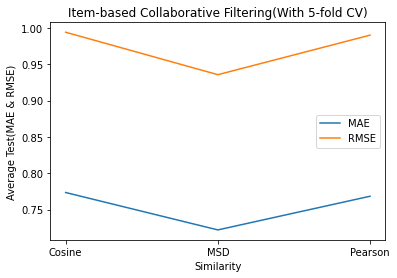

In [57]:
x = [0,1,2]
y_mae = [cv_ib_cosine['test_mae'].mean(),cv_ib_msd['test_mae'].mean(),cv_ib_pearson['test_mae'].mean()]
y_rmse = [cv_ib_cosine['test_rmse'].mean(),cv_ib_msd['test_rmse'].mean(),cv_ib_pearson['test_rmse'].mean()]
plt.plot(x, y_mae)
plt.plot(x, y_rmse)
plt.title('Item-based Collaborative Filtering(With 5-fold CV)')
plt.legend(['MAE','RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Average Test(MAE & RMSE)')
plt.show()

In [58]:
trainset, testset = train_test_split(data, test_size = 0.25, random_state = 42)

In [59]:
ubc_nn_mae = []
ubc_nn_rmse = []
k1 = list(np.arange(1,100,1))
for i in k1:
  ubc_nn = KNNBasic(k = i, sim_options = {'user_based' : True})
  ubc_nn.fit(trainset)
  predictions = ubc_nn.test(testset)
  ubc_nn_mae.append(accuracy.mae(predictions))
  ubc_nn_rmse.append(accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.9063
RMSE: 1.2110
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8196
RMSE: 1.0739
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7878
RMSE: 1.0270
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7706
RMSE: 1.0039
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7612
RMSE: 0.9913
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7537
RMSE: 0.9822
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7494
RMSE: 0.9772
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7467
RMSE: 0.9740
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7451
RMSE: 0.9721
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7435
RMSE: 0.9698
Computing 

In [60]:
ubc_nn_mae = []
ubc_nn_rmse = []
k1 = list(np.arange(1,100,1))
for i in k1:
  ubc_nn = KNNBasic(k = i, sim_options = {'user_based' : True})
  ubc_nn.fit(trainset)
  predictions = ubc_nn.test(testset)
  ubc_nn_mae.append(accuracy.mae(predictions))
  ubc_nn_rmse.append(accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.9063
RMSE: 1.2110
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8196
RMSE: 1.0739
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7878
RMSE: 1.0270
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7706
RMSE: 1.0039
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7612
RMSE: 0.9913
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7537
RMSE: 0.9822
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7494
RMSE: 0.9772
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7467
RMSE: 0.9740
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7451
RMSE: 0.9721
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7435
RMSE: 0.9698
Computing 

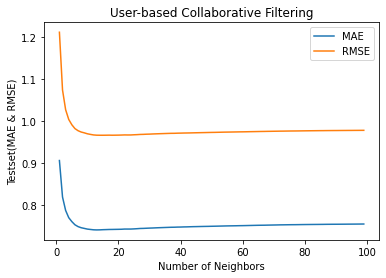

In [61]:
plt.plot(k1,ubc_nn_mae)
plt.plot(k1,ubc_nn_rmse)
plt.xlabel('Number of Neighbors')
plt.ylabel('Testset(MAE & RMSE)')
plt.legend(['MAE','RMSE'])
plt.title('User-based Collaborative Filtering')
plt.show()

In [63]:
#Best K
k_ubc = ubc_nn_rmse.index(min(ubc_nn_rmse))+1
print('Best Value of K : ', k_ubc)
print('Minimum RMSE : ', min(ubc_nn_rmse))

Best Value of K :  15
Minimum RMSE :  0.9663589276453397


In [64]:
ibc_nn_mae = []
ibc_nn_rmse = []
for i in k1:
  ibc_nn = KNNBasic(k = i, sim_options = {'user_based' : False})
  ibc_nn.fit(trainset)
  predictions = ibc_nn.test(testset)
  ibc_nn_mae.append(accuracy.mae(predictions))
  ibc_nn_rmse.append(accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.9703
RMSE: 1.3138
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8749
RMSE: 1.1479
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8337
RMSE: 1.0839
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8142
RMSE: 1.0514
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7966
RMSE: 1.0277
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7855
RMSE: 1.0127
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7765
RMSE: 1.0013
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7706
RMSE: 0.9935
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7659
RMSE: 0.9867
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7614
RMSE: 0.9816
Computing 

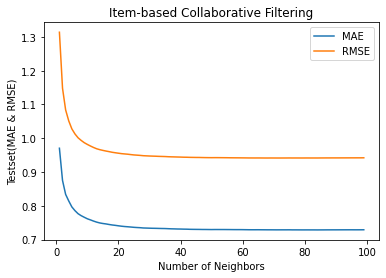

In [65]:
plt.plot(k1,ibc_nn_mae)
plt.plot(k1,ibc_nn_rmse)
plt.xlabel('Number of Neighbors')
plt.ylabel('Testset(MAE & RMSE)')
plt.legend(['MAE','RMSE'])
plt.title('Item-based Collaborative Filtering')
plt.show()

In [66]:
#Best K
k_ibc = ibc_nn_rmse.index(min(ibc_nn_rmse))+1
print('Best Value of K : ', k_ibc)
print('Minimum RMSE : ', min(ibc_nn_rmse))

Best Value of K :  68
Minimum RMSE :  0.941359509155313
